Team Jedward Datathon project!

In [2]:
#import values
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [3]:
#importing csv files to dataframes
customers_df = pd.read_csv("the_data\olist_customers_dataset.csv")
geolocation_df = pd.read_csv("the_data\olist_geolocation_dataset.csv")
order_items_df = pd.read_csv("the_data\olist_order_items_dataset.csv")
order_payment_df = pd.read_csv("the_data\olist_order_payments_dataset.csv")
order_reviews_df = pd.read_csv("the_data\olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("the_data\olist_orders_dataset.csv")
products_df = pd.read_csv("the_data\olist_products_dataset.csv")
sellers_df = pd.read_csv("the_data\olist_sellers_dataset.csv")

In [4]:
duplicate_customer_df = pd.DataFrame
duplicate_customer_df = customers_df[customers_df.duplicated(subset=['customer_unique_id'], keep=False)]
duplicate_customer_df = duplicate_customer_df.sort_values(by='customer_unique_id', ascending=False)
duplicate_customer_csv_data = duplicate_customer_df.to_csv('cleaned_data/duplicate_customer_dataset.csv', index = False)
duplicate_customer_df


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
12133,0088395699ea0fcd459bfbef084997db,ffe254cc039740e17dd15a5305035928,37640,extrema,MG
64323,4b231c90751c27521f7ee27ed2dc3b8f,ffe254cc039740e17dd15a5305035928,37640,extrema,MG
75057,1ae563fdfa500d150be6578066d83998,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
27992,bec0bf00ac5bee64ce8ef5283051a70c,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
79859,d064be88116eb8b958727aec4cf56a59,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
...,...,...,...,...,...
72451,49cf243e0d353cd418ca77868e24a670,004b45ec5c64187465168251cd1c9c2f,57055,maceio,AL
20023,1b4a75b3478138e99902678254b260f4,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
22066,f6efe5d5c7b85e12355f9d5c3db46da2,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
35608,24b0e2bd287e47d54d193e7bbb51103f,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA


In [5]:
geolocation_df = geolocation_df.drop_duplicates(subset=['geolocation_zip_code_prefix'], keep='first')
geolocation_csv_data = geolocation_df.to_csv('cleaned_data/geolocation_dataset_cleaned.csv', index = False)

In [6]:
print(order_items_df.isnull().sum())
print(order_items_df.duplicated().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
0


In [7]:
print(order_payment_df.isnull().sum())
print(order_payment_df.duplicated().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
0


In [8]:
order_reviews_df = order_reviews_df.fillna(0)

print(order_reviews_df.isnull().sum())
print(order_reviews_df.duplicated().sum())

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64
0


In [9]:
orders_df = orders_df.fillna(0)
print(orders_df.isnull().sum())
print(orders_df.duplicated(subset=['order_id']).sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64
0


In [10]:
products_df['product_category_name'] = products_df['product_category_name'].fillna('misc')
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(0)
products_df.isnull().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty              0
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [11]:
print(sellers_df.isnull().sum())
print(sellers_df.duplicated(subset=['seller_id']).sum())

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
0


In [12]:
final_df = pd.merge(duplicate_customer_df, orders_df[['customer_id', 'order_id']], on = "customer_id", how = "outer")

final_df.dropna()

asd = final_df.to_csv('cleaned_data/bruh1.csv', index = False)

final_df = pd.merge(final_df, order_items_df[['order_id', 'product_id', 'price']], on ="order_id", how = "outer")

final_df = pd.merge(final_df, products_df[['product_id', 'product_category_name', 'product_photos_qty']], on ="product_id", how = "inner")

final_df.dropna()

final_df = pd.merge(final_df, order_reviews_df[['order_id', 'review_score', 'review_comment_message']], on ="order_id", how = "outer")

final_df['review_score'] = final_df['review_score'].fillna(final_df['review_score'].mean())

final_df['review_comment_message'] = final_df['review_comment_message'].fillna(0)

final_df = final_df.dropna() 

final_df


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,product_id,price,product_category_name,product_photos_qty,review_score,review_comment_message
0,0088395699ea0fcd459bfbef084997db,ffe254cc039740e17dd15a5305035928,37640.0,extrema,MG,ebe76afae9242fc70b0b807b78f17adb,7ca5f56188492e30c50ba64de188aae7,13.90,cama_mesa_banho,1.0,5.0,baratheon e uma das melhores lojas.
1,f8ead8fa77e496442ea34c58340a7f5a,c6df3869c263531ebd51f0454a353605,96020.0,pelotas,RS,99ed5bfea4c7e7191a2412698fc7abbb,7ca5f56188492e30c50ba64de188aae7,13.90,cama_mesa_banho,1.0,5.0,0
2,d102ebbcb63b6d1806d5482c59d732d4,374fcbbfcf189ae177b2f955f9e74b3d,18275.0,tatui,SP,6b1d0be1d67ed935bcaab8aa908f2b3e,7ca5f56188492e30c50ba64de188aae7,13.90,cama_mesa_banho,1.0,5.0,Valeu a pena a compra. Fica muito bonito na cama
14,4b231c90751c27521f7ee27ed2dc3b8f,ffe254cc039740e17dd15a5305035928,37640.0,extrema,MG,39a0e2f723def2e12a51e963006c9242,18fc07433ae4bcd5a8bdf658b2c6e40d,37.18,cama_mesa_banho,1.0,1.0,Meu produto não certo. Insatisfeita\r\n
15,1ae563fdfa500d150be6578066d83998,ff922bdd6bafcdf99cb90d7f39cea5b3,17340.0,barra bonita,SP,fd216c435fda2be27c92920a5e5dba82,fd3a4121e687a6b84e7af92606d5d718,24.90,fashion_bolsas_e_acessorios,5.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48733,cbb68c721ba9ddb30d8a490cc1897fa1,00a39521eb40f7012db50455bf083460,72595.0,brasilia,DF,cea3e6c11eb60acb9d8d4d51694832f8,f89cd865cac300a9bf1320dd8f0fa223,11.55,eletronicos,1.0,4.0,0
48747,f530197ea86ced9488a03d055e118ebf,0058f300f57d7b93c477a131a59b36c3,40731.0,salvador,BA,2cfc79d9582e9135c0a9b61fa60e6b21,6bd248f93425ceeb625a8a97e2404112,59.90,papelaria,1.0,1.0,0
48769,49cf243e0d353cd418ca77868e24a670,004b45ec5c64187465168251cd1c9c2f,57055.0,maceio,AL,90ae229a4addcfead792e2564554f09c,b0961721fd839e9982420e807758a2a6,59.90,ferramentas_jardim,2.0,1.0,Infelizmente o produto ainda não chegou. Houve...
48881,f6efe5d5c7b85e12355f9d5c3db46da2,004288347e5e88a27ded2bb23747066c,26220.0,nova iguacu,RJ,08204559bebd39e09ee52dcb56d8faa2,a2bd2eae20998a24c22b110334928b02,87.90,malas_acessorios,1.0,5.0,"Maravilhoso,amei e chegou antes do prazo !"


    review_score                             review_comment_message
3              5              Recebi bem antes do prazo estipulado.
4              5  Parabéns lojas lannister adorei comprar pela I...
9              4  aparelho eficiente. no site a marca do aparelh...
12             4    Mas um pouco ,travando...pelo valor ta Boa.\r\n
15             5  Vendedor confiável, produto ok e entrega antes...
16             2  GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...
19             1                                            Péssimo
22             5                                       Loja nota 10
24             5              obrigado pela atençao amim dispensada
27             5  A compra foi realizada facilmente.\r\nA entreg...
28             5                     relógio muito bonito e barato.
29             1                Não gostei ! Comprei gato por lebre
32             1  Sempre compro pela Internet e a entrega ocorre...
34             4  Recebi exatamente o que espera

(array([0.2667655 , 0.06543305, 0.10850599, 0.18229739, 0.62699807]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

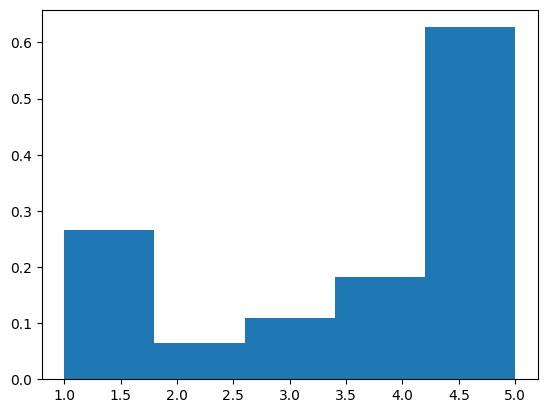

In [13]:
order_reviews_clean_df = pd.DataFrame()
order_reviews_clean_df['review_score'] = order_reviews_df['review_score'].fillna(order_reviews_df['review_score'].mean())
order_reviews_clean_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna(0)

order_reviews_clean_df[['review_score', 'review_comment_message']]

l = []
for i in order_reviews_clean_df['review_comment_message']:
    if i != 0:
        l.append(i)

order_reviews_clean_df[['review_score', 'review_comment_message']]

order_reviews_filtered_df = order_reviews_clean_df[order_reviews_clean_df['review_comment_message'] != 0]
print(order_reviews_filtered_df.head(15))
plt.hist(order_reviews_filtered_df['review_score'], density = True, bins=5)



    review_score review_comment_message
0              4                      0
1              5                      0
2              5                      0
5              1                      0
6              5                      0
7              5                      0
8              5                      0
10             5                      0
11             5                      0
13             4                      0
14             3                      0
17             5                      0
18             3                      0
20             4                      0
21             5                      0


(array([0.05749223, 0.02158909, 0.09918966, 0.28254674, 0.78918228]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

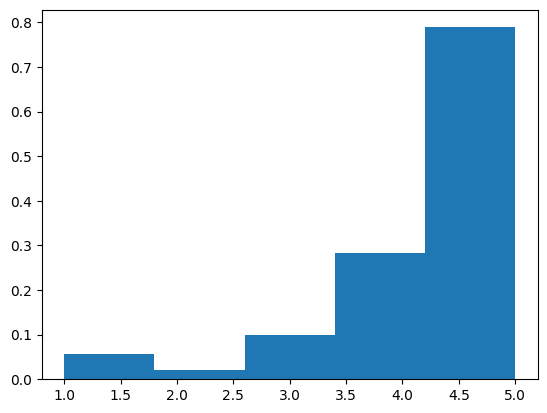

In [14]:
order_noreviews_filtered_df = order_reviews_clean_df[order_reviews_clean_df['review_comment_message'] == 0]
print(order_noreviews_filtered_df.head(15))
plt.hist(order_noreviews_filtered_df['review_score'], density = True, bins=5)

In [15]:
final_df['product_category_name'].shape

(8135,)

'\ncama_mesa_banho                  11270\nbeleza_saude                      9727\nesporte_lazer                     8700\nmoveis_decoracao                  8415\ninformatica_acessorios            7894\n'

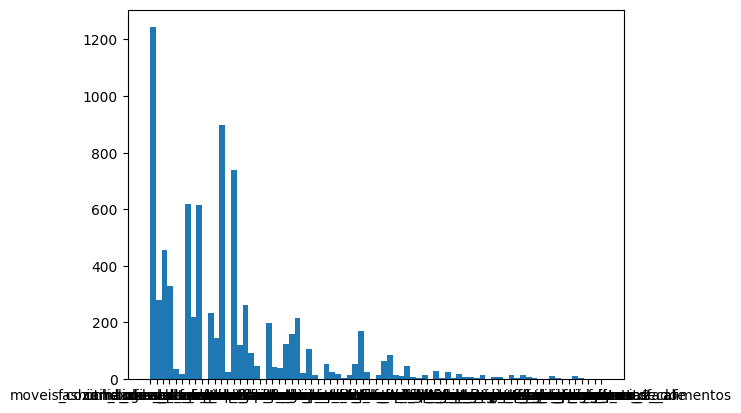

In [16]:
list = []
for i in final_df['product_category_name']:
    if i != 0:
        list.append(i)
plt.hist(list, bins = 78)
plt.show

final_df['product_category_name'].value_counts()


"""
cama_mesa_banho                  11270
beleza_saude                      9727
esporte_lazer                     8700
moveis_decoracao                  8415
informatica_acessorios            7894
"""

In [17]:
print(products_df.isnull().sum())

seller_product_info_df=pd.merge(products_df[['product_id', 'product_category_name']], order_items_df[['seller_id','product_id','price']], on ="product_id", how = "outer")
seller_product_info_df

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty              0
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


,product_id,product_category_name,seller_id,price
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,5670f4db5b62c43d542e1b2d56b0cf7c,10.91
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,b561927807645834b59ef0d16ba55a24,248.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,7b07b3c7487f0ea825fc6df75abd658b,79.80
3,cef67bcfe19066a932b7673e239eb23d,bebes,c510bc1718f0f2961eaa42a23330681a,112.30
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,0be8ff43f22e456b4e0371b2245e4d01,37.90
...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,4324dd16853115efb0fd9d0d131ba6f4,29.90
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,4324dd16853115efb0fd9d0d131ba6f4,29.90
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,4324dd16853115efb0fd9d0d131ba6f4,29.90
112648,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,4324dd16853115efb0fd9d0d131ba6f4,29.90


In [56]:
#Rating System
import statistics

rating_df = pd.DataFrame()
rating_df = pd.merge(order_reviews_df[['order_id', 'review_score', 'review_comment_message']], order_items_df[['order_id', 'product_id']], on = "order_id", how="outer")

rating_df['review_score'] = rating_df['review_score'].fillna(rating_df['review_score'].median())
rating_df['review_comment_message'] = rating_df['review_comment_message'].fillna(0)

rating_df = rating_df[['review_score', 'review_comment_message', 'product_id']]

for i in rating_df.index:
    if rating_df['review_score'][i]==1 and rating_df['review_comment_message'][i]!=0:
        rating_df['review_score'][i]=0

rating_df

products = []
for i in rating_df['product_id'].drop_duplicates('first'):
    products.append(i)

avg_rating_dict={}
for i in products:
    avg_rating_dict[i]= []

avg_rating_dict

for i in rating_df.index:
    avg_rating_dict[rating_df['product_id'][i]].append(rating_df['review_score'][i])

avg_rating_dict

averages=[]
amounts=[]
for i in avg_rating_dict:
    averages.append(statistics.mean(avg_rating_dict[i]))
    amounts.append(len(avg_rating_dict[i]))

avg_rating_df = pd.DataFrame(columns=avg_rating_dict.keys())

avg_rating_df.loc[0] = averages
avg_rating_df.loc[1] = amounts

avg_rating_df

C:\Users\jason\AppData\Local\Temp\ipykernel_25552\3735722768.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df['review_score'][i]=0
C:\Users\jason\AppData\Local\Temp\ipykernel_25552\3735722768.py:19: FutureWarning: In a future version of pandas all arguments of Series.drop_duplicates will be keyword-only.
  for i in rating_df['product_id'].drop_duplicates('first'):


,fd25ab760bfbba13c198fa3b4f1a0cd3,be0dbdc3d67d55727a65d4cd696ca73c,d1c427060a0f73f6b889a5c7c61f2ac4,52c80cedd4e90108bf4fa6a206ef6b03,3880d25d502b15b1de6fddc42ad1d67a,c45d02cc82cd779835094de9b29272cb,4e3550b4ebca5e32ccc3d32b3470e31f,3152a0c0d93abeec99e4a6169aecc88b,306e6b5dda3397e4a9312f94d82565b5,35afc973633aaeb6b877ff57b2793310,...,6ad3413ad491b857999157ee4fc403d9,54caa022e792f1ce31d4a656cecaa802,52bd2502183574fc11a434d5d215a4cd,bb936e22237d5ec143263050cd705132,d59267ac2ab76cbed276481ceb149023,31129af5d35d9ff3136470ea2305705d,9c74c26ab807a4a6a5c1dd3c0a112d76,3324465da0373199261538db9d035411,be4d4aacf88585bba5689cbc3393e0cc,69c590f7ffc7bf8db97190b6cb6ed62e
0,4.5,2.740741,4.119534,4.110169,5.0,1.0,1.0,5.0,3.5,3.676647,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,4.0,27.000000,343.000000,118.000000,3.0,3.0,1.0,1.0,4.0,167.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
